In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
one_yr_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > '2016-08-23').\
                        order_by(Measurement.date).all()
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date
# Perform a query to retrieve the data and precipitation scores
precipitation_df = pd.DataFrame(one_yr_prcp, columns=['date', 'prcp'])
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'], format='%Y/%m/%d')


In [13]:
# Sort the dataframe by date
precipitation_df.set_index(precipitation_df['date'])
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


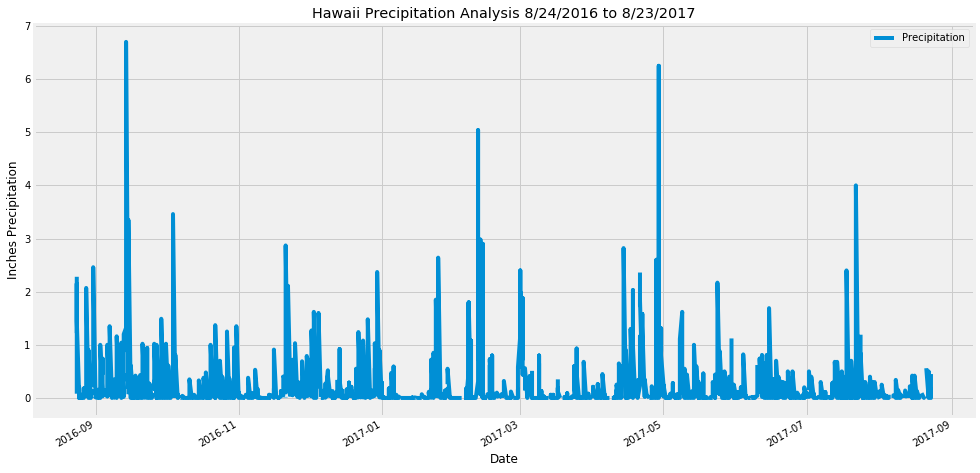

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot('date', 'prcp', figsize=(15, 8))
plt.xlabel("Date")
plt.ylabel("Inches Precipitation")
plt.title("Hawaii Precipitation Analysis 8/24/2016 to 8/23/2017")
plt.legend(["Precipitation"])
plt.savefig("precipitation.png")
#plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.name)).all()

[(9)]

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_results = session.query(func.count(Station.station)).all()

active_results = session.query(Measurement.station,
   'date', func.count(Measurement.date)).group_by(Measurement.station).all()
for result in active_results:
    print(result)

('USC00511918', '2015-10-30', 1979)
('USC00513117', '2017-07-31', 2709)
('USC00514830', '2017-08-23', 2202)
('USC00516128', '2017-08-23', 2612)
('USC00517948', '2017-07-31', 1372)
('USC00518838', '2015-11-20', 511)
('USC00519281', '2017-08-18', 2772)
('USC00519397', '2017-08-23', 2724)
('USC00519523', '2017-08-23', 2669)


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
highest_obsv_num = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
print(highest_obsv_num)

('USC00519281', 2772)


In [30]:
lowest_obsv_num = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).asc()).first()
print(lowest_obsv_num)

('USC00518838', 511)


In [32]:
avg_obsv_num = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).all()
print(avg_obsv_num)

SyntaxError: invalid syntax (<ipython-input-32-99d8e95bb39b>, line 2)

In [34]:
# Choose the station with the highest number of temperature observations.
obsv_num = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
print(obsv_num)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2017-01-06').\
    order_by(Measurement.date).all()
temps

('USC00519281', 2772)


[('USC00519397', '2017-01-07', 66.0),
 ('USC00513117', '2017-01-07', 72.0),
 ('USC00514830', '2017-01-07', 71.0),
 ('USC00519523', '2017-01-07', 72.0),
 ('USC00519281', '2017-01-07', 70.0),
 ('USC00516128', '2017-01-07', 70.0),
 ('USC00519397', '2017-01-08', 60.0),
 ('USC00513117', '2017-01-08', 62.0),
 ('USC00514830', '2017-01-08', 74.0),
 ('USC00519523', '2017-01-08', 74.0),
 ('USC00519281', '2017-01-08', 70.0),
 ('USC00516128', '2017-01-08', 66.0),
 ('USC00519397', '2017-01-09', 64.0),
 ('USC00513117', '2017-01-09', 65.0),
 ('USC00514830', '2017-01-09', 72.0),
 ('USC00517948', '2017-01-09', 65.0),
 ('USC00519523', '2017-01-09', 77.0),
 ('USC00519281', '2017-01-09', 62.0),
 ('USC00516128', '2017-01-09', 69.0),
 ('USC00519397', '2017-01-10', 63.0),
 ('USC00513117', '2017-01-10', 66.0),
 ('USC00514830', '2017-01-10', 72.0),
 ('USC00517948', '2017-01-10', 65.0),
 ('USC00519523', '2017-01-10', 75.0),
 ('USC00519281', '2017-01-10', 62.0),
 ('USC00516128', '2017-01-10', 64.0),
 ('USC005193

![precipitation](Images/station-histogram.png)

In [35]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [36]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
Temp=[]
start_date='2016-08-01'
end_date='2017-08-01'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
    #print(str(TMAX))
    #print(str(TMIN))
    #print(str(TAVG))
calc_temps(start_date, end_date)
Temp

[87.0, 58.0, 74.64288840262581]

In [38]:
TAVG=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]

/Users/ericacecil/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


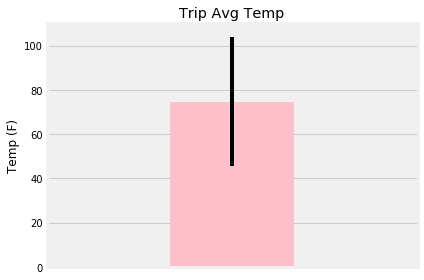

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig = plt.figure()
plt.bar( 1,TAVG, color = 'pink', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()
fig.savefig('Trip Avg Temp.png', dpi=fig.dpi)

In [41]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
Rainfall_results = session.query(Measurement.station, func.count(Measurement.prcp)).\
                   group_by(Measurement.station).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
Rainfall_results


[('USC00513117', 365),
 ('USC00514830', 261),
 ('USC00516128', 331),
 ('USC00517948', 67),
 ('USC00519281', 365),
 ('USC00519397', 361),
 ('USC00519523', 320)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


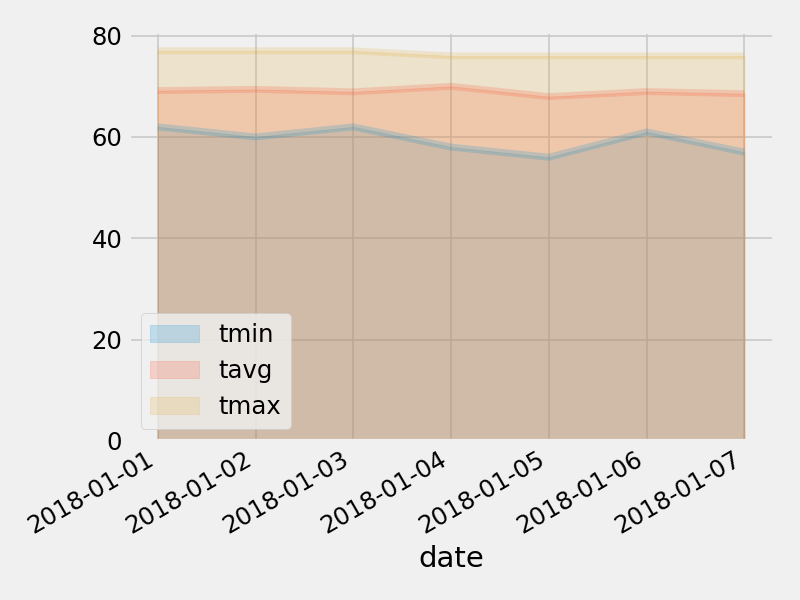

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
